In [2]:
from hand_cnn import HandCropCNN
import torch
import glob
import cv2
import matplotlib.pyplot as plt 
from utils import plot_process, plot_samples

In [ ]:
%mkdir weights

In [ ]:
!bash get_handcrops.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3138      0 --:--:-- --:--:-- --:--:--  3138
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23.7M    0 23.7M    0     0  44.2M      0 --:--:-- --:--:-- --:--:-- 44.2M


### Train

In [ ]:
# Training
!python hand_cnn.py --mode train --dataset datasets/handcrops --save-txt results --batch-size 100 --epochs 3 --lr 0.0001 --augment

Namespace(augment=True, batch_size=100, dataset='datasets/handcrops', epochs=3, lr=0.0001, mode='train', save_txt='results', source='samples', weight='weights/handcnn.pt')
Using CUDA
Training...

     Epoch      Train loss   Test accuracy
100% 132/132 [00:08<00:00, 15.22it/s]

         1          0.4454          0.9096

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00, 15.20it/s]

         2          0.4205          0.9105

Epoch lasts: 00:00:10

Training duration: 00:00:20


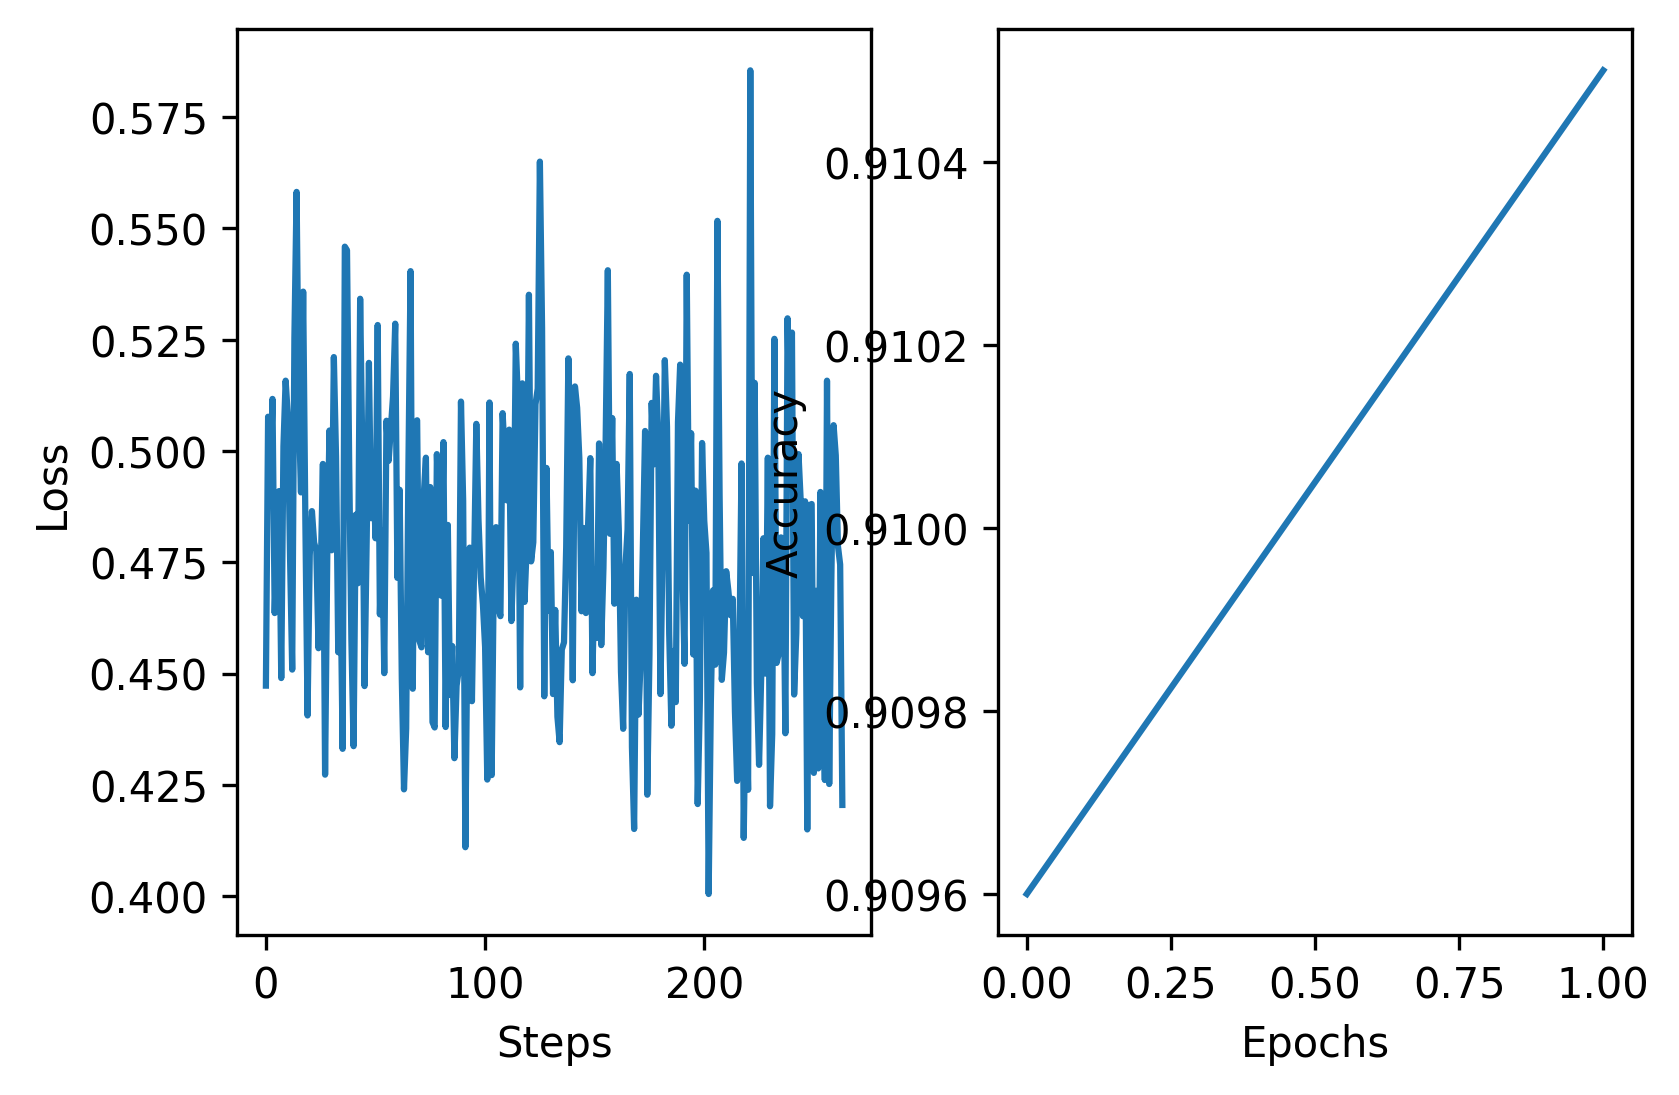

In [ ]:
plot_process('results')

In [ ]:
# Resume training
!python hand_cnn.py --mode train --dataset datasets/handcrops --weight weights/handcnn.pt --save-txt results --batch-size 100 --epochs 10 --lr 0.0001 --augment

Namespace(augment=True, batch_size=100, dataset='datasets/handcrops', epochs=10, lr=0.0001, mode='train', save_txt='results', source='samples', weight='weights/handcnn.pt')
Using CUDA
Training...

     Epoch      Train loss   Test accuracy
100% 132/132 [00:08<00:00, 15.47it/s]

         2          0.5024          0.9185

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00, 15.38it/s]

         3           0.484          0.9223

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00, 15.40it/s]

         4          0.5585          0.9155

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00, 15.13it/s]

         5          0.3559          0.9257

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00, 15.36it/s]

         6          0.4726          0.9298

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00, 15.51it/s]

         7          0.6667           0.923

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00, 15.31it/s]

         8          0.4653          0.9232

Epoch lasts: 00:00:10
100% 132/132 [00:08<00:00

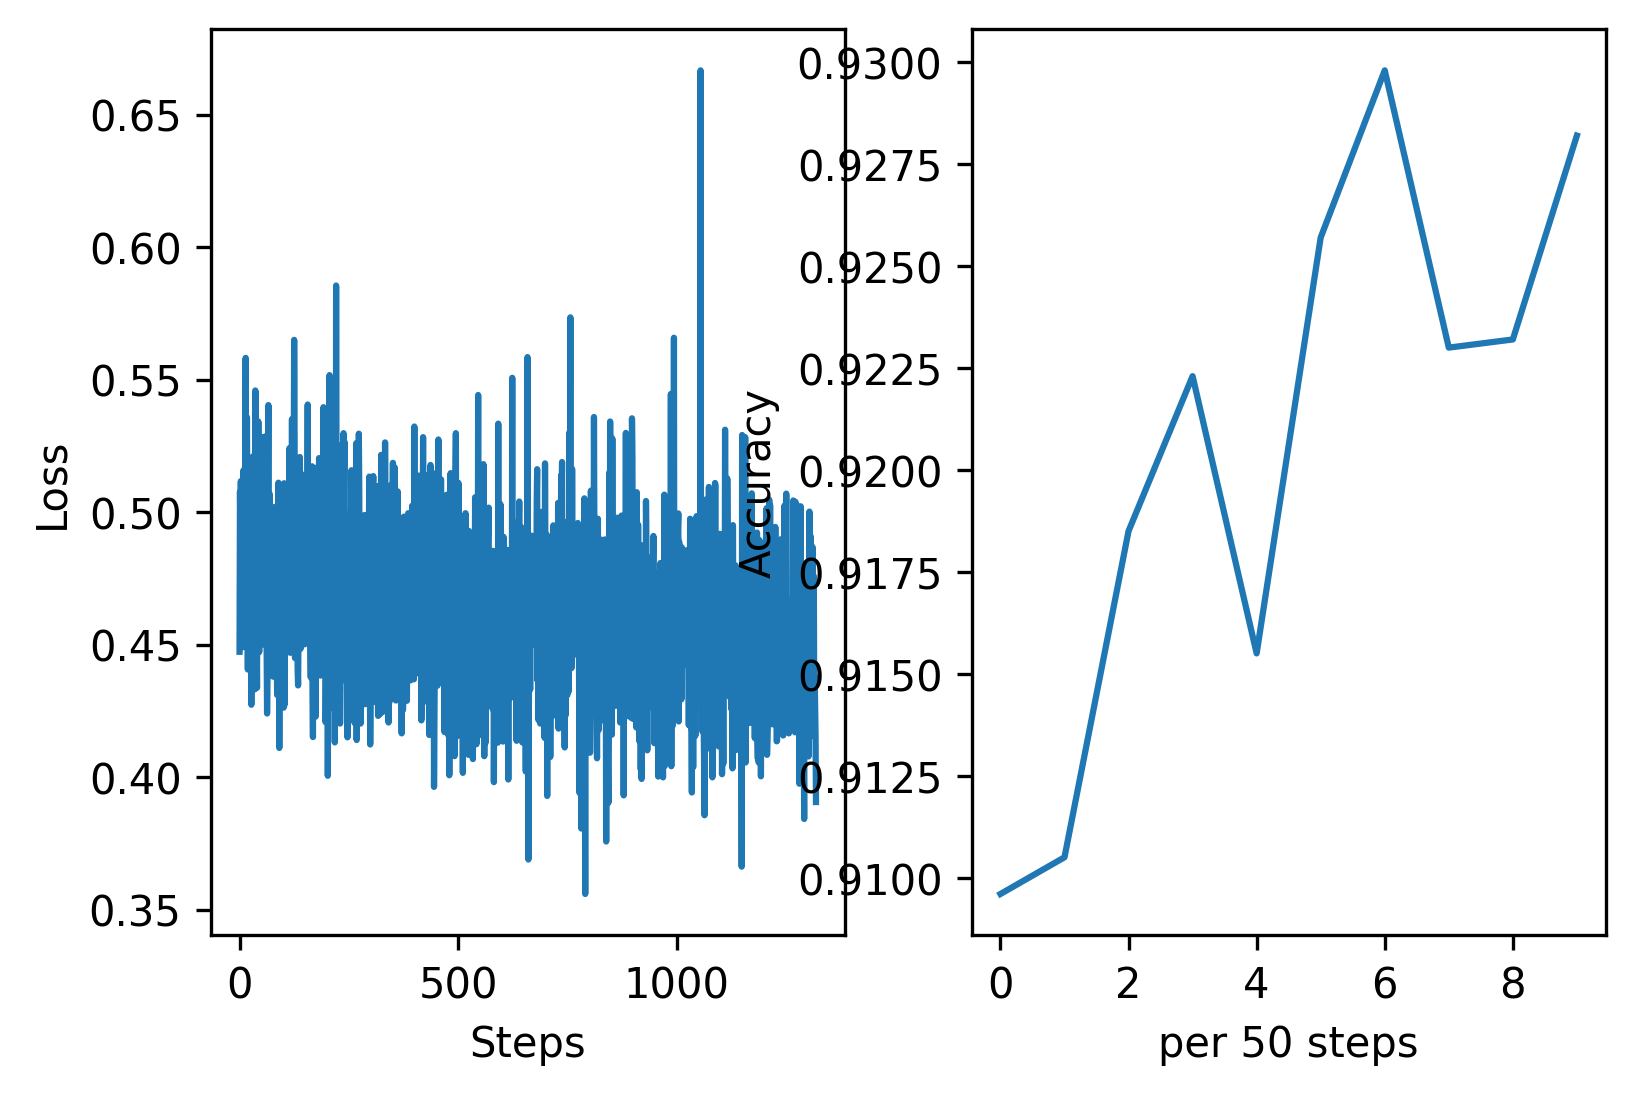

In [ ]:
plot_process('results')

### Test

In [ ]:
!python hand_cnn.py --mode test --batch-size 100 --weight weights/handcnn.pt

Namespace(augment=False, batch_size=100, dataset='datasets/handcrops', epochs=3, lr=0.0001, mode='test', save_txt='', source='samples', weight='weights/handcnn.pt')
Using CUDA
Evaluating...
Evaluated accuracy: 0.9295


### Detect

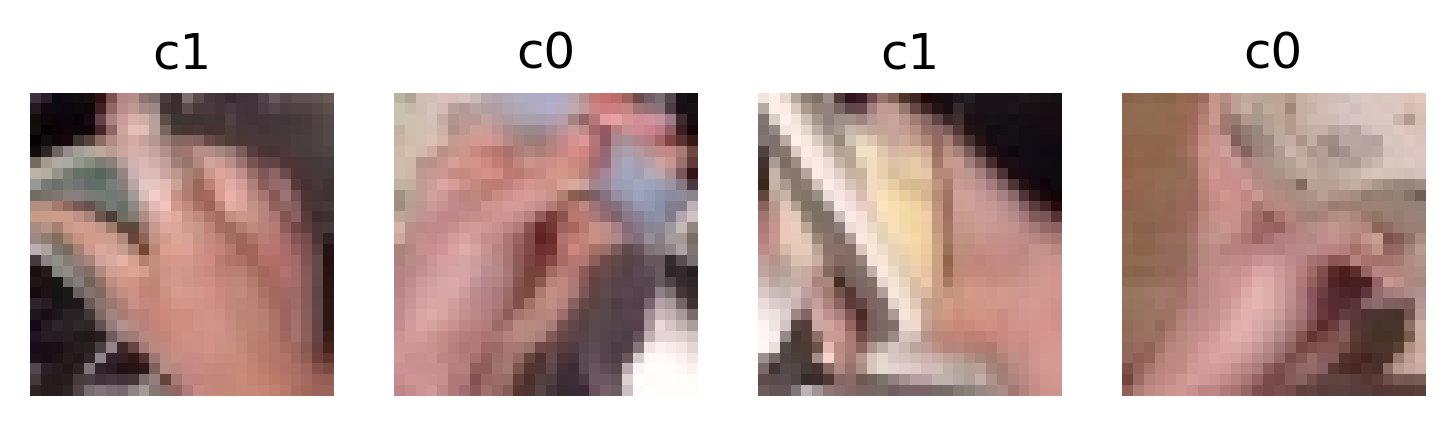

In [3]:
plot_samples('samples')

In [ ]:
!python hand_cnn.py --mode detect --weight weights/handcnn.pt --source samples

Namespace(augment=False, batch_size=50, dataset='datasets/handcrops', epochs=3, lr=0.0001, mode='detect', save_txt='', source='samples', weight='weights/handcnn.pt')
Using CUDA
Detecting...
Image                                   Prediction           left_hand:right_hand     
samples/P01_02_0000002821_c1.jpg        right_hand              0.0000:1.0000         
samples/P01_02_0000002911_c0.jpg        left_hand               1.0000:0.0000         
samples/P01_02_0000002911_c1.jpg        right_hand              0.0000:1.0000         
samples/P01_02_0000003211_c0.jpg        left_hand               1.0000:0.0000         
Mean classification time: 0.0011s


In [ ]:
# Compatible for integration
model = HandCropCNN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
weight_file = 'weights/handcnn.pt'

patches = []
imgs = sorted(glob.glob('samples/' + '*jpg'))
for im_path in imgs:
    img = cv2.imread(im_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    patches.append(img)
patches = tuple(patches)

with open('datasets/handcrops/classes.names', 'r') as f:
    classes = [line.rstrip() for line in f]

cls_conf, labels = model.detect(device, weight_file, patches, classes)

Prediction           left_hand:right_hand     
right_hand              0.0000:1.0000         
left_hand               1.0000:0.0000         
right_hand              0.0000:1.0000         
left_hand               1.0000:0.0000         
Mean classification time: 0.0018s
